Análisis del Facundo
==================

In [1]:
import spacy
import textacy
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file = open("Facundo",encoding="utf-8")
nlp = spacy.load('es')


In [3]:
#Vamos a remover el preludio y final del proyecto gutenberg
Facundo = ''
start = "*** START OF THIS PROJECT GUTENBERG EBOOK FACUNDO ***\n"
end = "*** END OF THIS PROJECT GUTENBERG EBOOK FACUNDO ***\n"
for line in iter(file.readline,start):
    pass
for line in iter(file.readline,end):
    Facundo += line
    
Facundo = textacy.preprocess.preprocess_text(Facundo, lowercase=True, no_punct=True)

In [4]:
file.close()
doc_facundo = textacy.doc.Doc(Facundo)

Aquí ya hemos generado el doc 

In [75]:
#Aqui estamos generando un diccionario con las palabras que aparecian en el doc.
term_facundo =  doc_facundo.to_bag_of_terms(as_strings=True,ngrams=1,filter_stop=True,filter_punct = True,filter_nums=True,
                                            min_freq=3)
del term_facundo['y']
del term_facundo['']
del term_facundo['a']
del term_facundo['e']

In [76]:
names = textacy.extract.named_entities(term_facundo)

In [111]:
#Ahora ordenamos los valores, para ello lo hacemos usando tuplas.
sorted_term = sorted(term_facundo.items(), key=lambda freq: freq[1],reverse=True)
def frecuencia(array):
    frec=[]
    for i in array:
        frec.append(i[1])
    return frec

def palabra(array):
    palabra = []
    for i in array:
        palabra.append(i[0])
    return palabra    


In [115]:
palabra(sorted_term)[1]

'rosa'

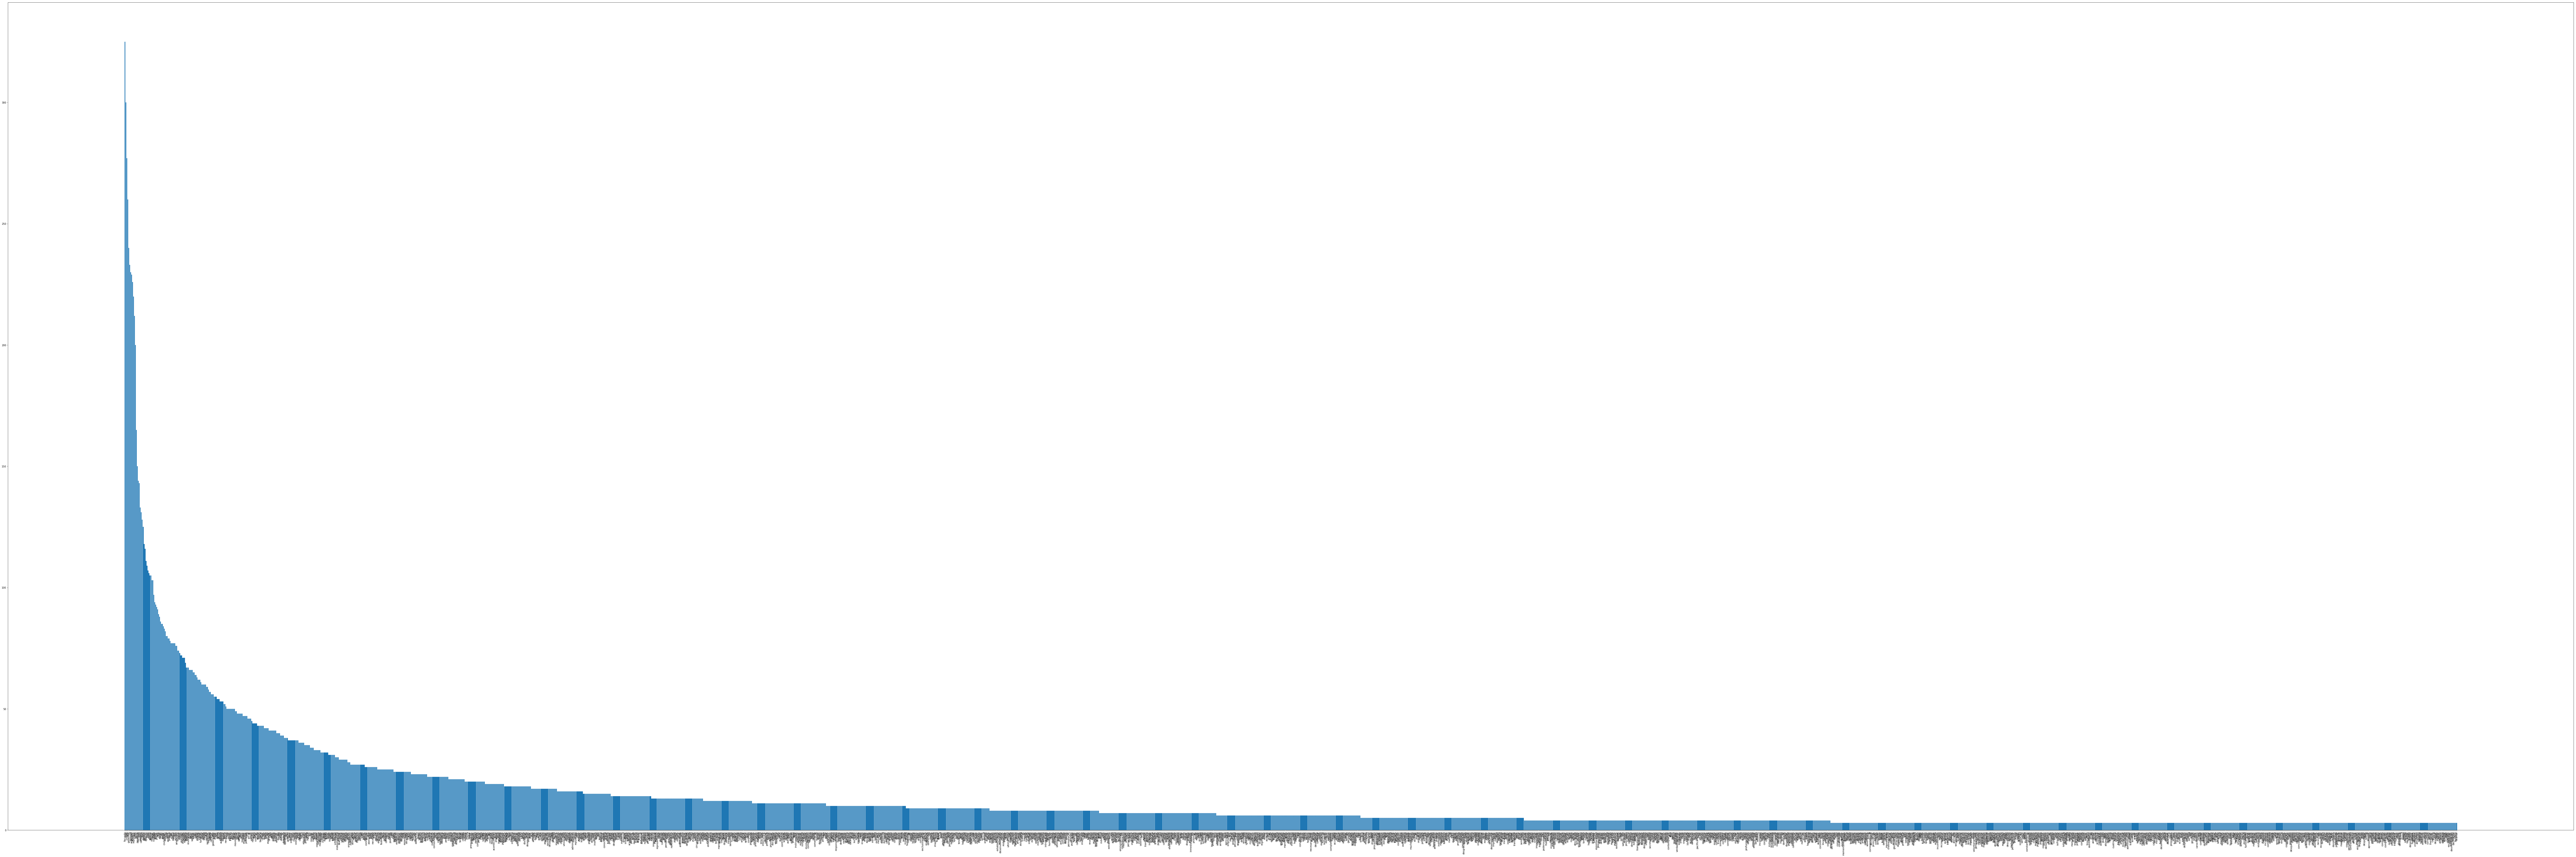

In [113]:
fig = plt.figure(figsize=(150,50))
plt.bar(range(len(sorted_term)),frecuencia(sorted_term),align='center',)
plt.xticks(range(len(term_facundo)),palabra(sorted_term),rotation='vertical')
plt.tight_layout()
plt.show()

list

<function list.pop>